# Hyperparameter Comparison

In [16]:
import pandas as pd
import numpy as np

df = pd.read_csv('../../data/raw/realistic_linear_regression_dataset.csv')
df.head()

,ProductCategory,Region,CustomerSegment,IsPromotionApplied,ProductionCost,MarketingSpend,SeasonalDemandIndex,CompetitorPrice,CustomerRating,EconomicIndex,StoreCount,SalesRevenue
0,Furniture,East,High Income,Yes,536.051521,189.277811,1.159611,220.831351,4.035607,146.225757,52,2293.143707
1,Toys,West,High Income,No,352.701361,255.921497,1.545366,467.217175,4.106804,104.261304,35,1640.454368
2,Electronics,South,High Income,No,618.989105,277.399353,1.671902,363.623261,4.021775,77.220752,44,2173.086023
3,Furniture,West,Middle Income,Yes,339.959644,153.557699,1.408244,209.853621,4.148890,128.277455,15,1672.608857
4,Furniture,West,Middle Income,Yes,477.951385,155.814478,2.177301,274.859950,4.913782,111.309643,61,2443.222482


In [17]:
X = df.drop(columns=["SalesRevenue"])
y = df["SalesRevenue"]

numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

print(f"(X) Trainning Shape: {X_train.shape}")
print(f"(X) Test Shape: {X_test.shape}")

(X) Trainning Shape: (1600, 11)
(X) Test Shape: (400, 11)


In [18]:
X_train["IsPromotionApplied"] = X_train["IsPromotionApplied"].map({'Yes': 1, 'No': 0})
X_test["IsPromotionApplied"] = X_test["IsPromotionApplied"].map({'Yes': 1, 'No': 0})

categorical_cols = X_train.select_dtypes(include=["object", "category"]).columns

X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Not Bool type (True/False) -> Int (1/0)
dummy_cols_train = X_train.select_dtypes(include=["bool"]).columns
dummy_cols_test = X_test.select_dtypes(include=["bool"]).columns

X_train[dummy_cols_train] = X_train[dummy_cols_train].astype(int)
X_test[dummy_cols_test] = X_test[dummy_cols_test].astype(int)

# Align columns test with train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

X_train.head()

,IsPromotionApplied,ProductionCost,MarketingSpend,SeasonalDemandIndex,CompetitorPrice,CustomerRating,EconomicIndex,StoreCount,ProductCategory_Electronics,ProductCategory_Furniture,ProductCategory_Toys,Region_North,Region_South,Region_West,CustomerSegment_Low Income,CustomerSegment_Middle Income
968,1,706.324700,193.672022,0.691915,337.415950,3.469131,83.795709,10,0,0,0,0,0,0,0,0
240,0,419.829496,188.151586,1.374859,345.922550,4.805004,130.724965,82,0,0,0,1,0,0,1,0
819,0,516.855830,233.996923,1.499186,390.185659,3.865647,97.488531,86,1,0,0,0,1,0,0,0
692,1,244.368213,241.848794,1.081512,161.187309,3.968205,80.903238,83,1,0,0,0,0,1,1,0
420,0,518.793165,281.602125,1.224310,376.199077,3.637271,138.878918,12,0,0,0,1,0,0,0,0


In [19]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()

X_train[numeric_cols] = scaler_x.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler_x.transform(X_test[numeric_cols])

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

X_train.head()

,IsPromotionApplied,ProductionCost,MarketingSpend,SeasonalDemandIndex,CompetitorPrice,CustomerRating,EconomicIndex,StoreCount,ProductCategory_Electronics,ProductCategory_Furniture,ProductCategory_Toys,Region_North,Region_South,Region_West,CustomerSegment_Low Income,CustomerSegment_Middle Income
968,1,2.083952,-0.150868,-1.549476,0.483381,-1.059334,-0.853222,-1.353726,0,0,0,0,0,0,0,0
240,0,-0.819344,-0.260931,-0.202668,0.587488,1.611386,1.587416,1.156725,0,0,0,1,0,0,1,0
819,0,0.163905,0.653104,0.042513,1.129195,-0.266607,-0.141103,1.296195,1,0,0,0,1,0,0,0
692,1,-2.597441,0.809650,-0.781167,-1.673368,-0.061570,-1.003650,1.191593,1,0,0,0,0,1,1,0
420,0,0.183538,1.602227,-0.499560,0.958022,-0.723184,2.011477,-1.283991,0,0,0,1,0,0,0,0



 Running 1/10
Hyperparameters: {'layers': [16, 32, 1], 'epochs': 100, 'lr': 0.001, 'momentum': 0.9, 'fact': 'relu'}
[16, 32, 1]
Epoch 1/100, Train MSE: 0.223087, Validation MSE: 0.226735
Epoch 11/100, Train MSE: 0.118033, Validation MSE: 0.144899
Epoch 21/100, Train MSE: 0.103997, Validation MSE: 0.129625
Epoch 31/100, Train MSE: 0.107372, Validation MSE: 0.125450
Epoch 41/100, Train MSE: 0.095880, Validation MSE: 0.111592
Epoch 51/100, Train MSE: 0.089664, Validation MSE: 0.110739
Epoch 61/100, Train MSE: 0.092043, Validation MSE: 0.120257
Epoch 71/100, Train MSE: 0.093946, Validation MSE: 0.110207
Epoch 81/100, Train MSE: 0.096646, Validation MSE: 0.103532
Epoch 91/100, Train MSE: 0.096956, Validation MSE: 0.112705
Epoch 100/100, Train MSE: 0.117439, Validation MSE: 0.129107


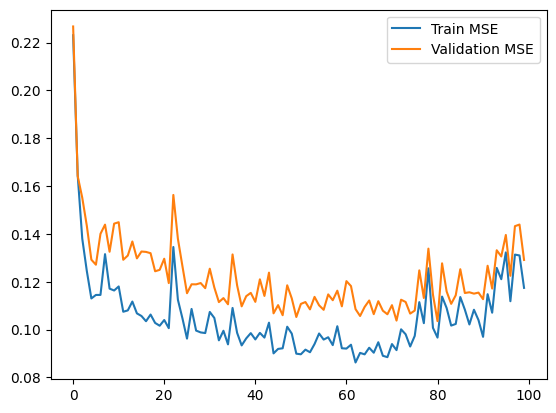


=== NN BP Train===
MAE Train: 92.0432
MSE Train: 14314.9258
MAPE Train: 0.0468
R² Train: 0.8802

---
MAE Test: 96.8756
MSE Test: 14759.8871
MAPE Test: 0.0487
R² Test: 0.8771


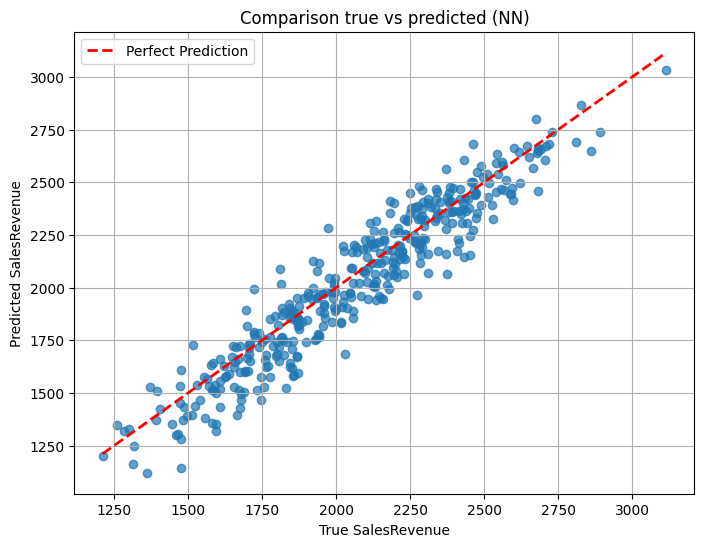


 Running 2/10
Hyperparameters: {'layers': [16, 32, 1], 'epochs': 100, 'lr': 0.001, 'momentum': 0.0, 'fact': 'relu'}
[16, 32, 1]
Epoch 1/100, Train MSE: 0.601020, Validation MSE: 0.621696
Epoch 11/100, Train MSE: 0.145137, Validation MSE: 0.171730
Epoch 21/100, Train MSE: 0.131153, Validation MSE: 0.153908
Epoch 31/100, Train MSE: 0.126518, Validation MSE: 0.151167
Epoch 41/100, Train MSE: 0.122754, Validation MSE: 0.145491
Epoch 51/100, Train MSE: 0.122986, Validation MSE: 0.146314
Epoch 61/100, Train MSE: 0.126550, Validation MSE: 0.150300
Epoch 71/100, Train MSE: 0.137289, Validation MSE: 0.159006
Epoch 81/100, Train MSE: 0.136179, Validation MSE: 0.162055
Epoch 91/100, Train MSE: 0.140092, Validation MSE: 0.164178
Epoch 100/100, Train MSE: 0.141883, Validation MSE: 0.163065


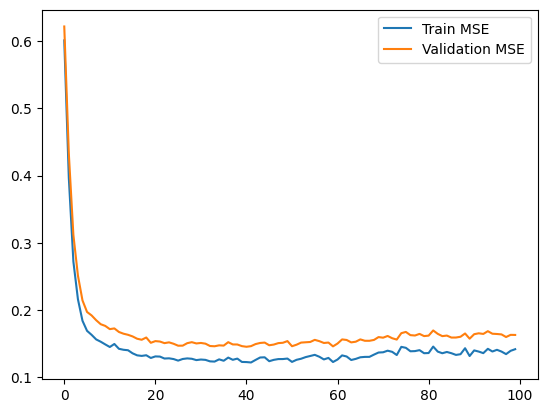


=== NN BP Train===
MAE Train: 101.4070
MSE Train: 17463.7996
MAPE Train: 0.0542
R² Train: 0.8539

---
MAE Test: 109.1808
MSE Test: 19594.3164
MAPE Test: 0.0588
R² Test: 0.8369


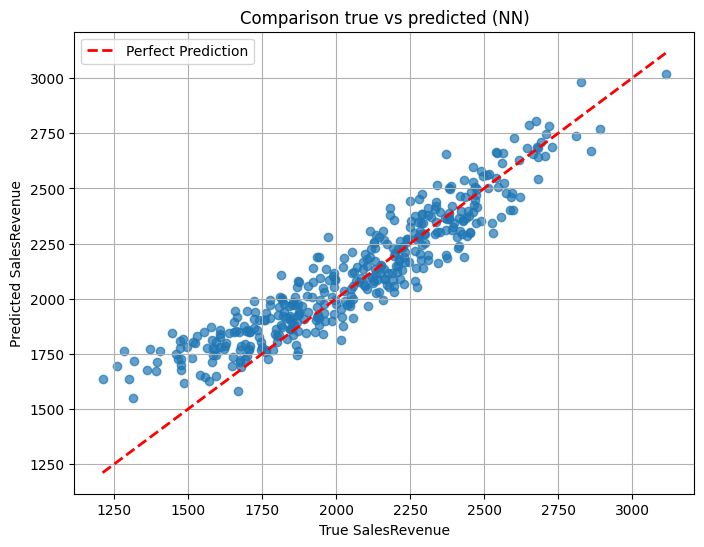


 Running 3/10
Hyperparameters: {'layers': [16, 32, 1], 'epochs': 100, 'lr': 0.01, 'momentum': 0.5, 'fact': 'sigmoid'}
[16, 32, 1]
Epoch 1/100, Train MSE: 0.164520, Validation MSE: 0.207110
Epoch 11/100, Train MSE: 0.099209, Validation MSE: 0.115799
Epoch 21/100, Train MSE: 0.090936, Validation MSE: 0.110250
Epoch 31/100, Train MSE: 0.086429, Validation MSE: 0.109350
Epoch 41/100, Train MSE: 0.083318, Validation MSE: 0.105966
Epoch 51/100, Train MSE: 0.081528, Validation MSE: 0.103541
Epoch 61/100, Train MSE: 0.082362, Validation MSE: 0.101604
Epoch 71/100, Train MSE: 0.078228, Validation MSE: 0.098174
Epoch 81/100, Train MSE: 0.079023, Validation MSE: 0.103103
Epoch 91/100, Train MSE: 0.078108, Validation MSE: 0.097137
Epoch 100/100, Train MSE: 0.078718, Validation MSE: 0.098728


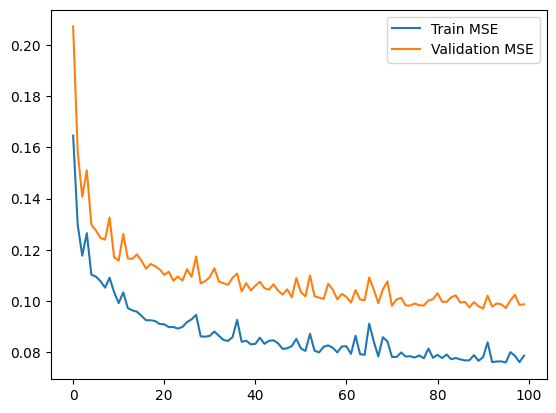


=== NN BP Train===
MAE Train: 79.0910
MSE Train: 9886.4768
MAPE Train: 0.0399
R² Train: 0.9173

---
MAE Test: 80.5224
MSE Test: 10399.6210
MAPE Test: 0.0406
R² Test: 0.9134


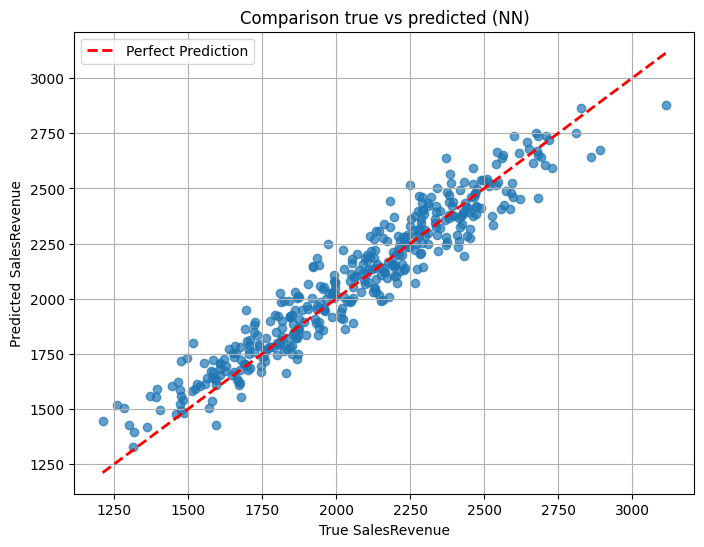


 Running 4/10
Hyperparameters: {'layers': [16, 64, 32, 1], 'epochs': 100, 'lr': 0.01, 'momentum': 0.9, 'fact': 'relu'}
[16, 64, 32, 1]
Epoch 1/100, Train MSE: 24.110592, Validation MSE: 24.668936
Epoch 11/100, Train MSE: 24.110592, Validation MSE: 24.668936
Epoch 21/100, Train MSE: 24.110592, Validation MSE: 24.668936
Epoch 31/100, Train MSE: 24.110592, Validation MSE: 24.668936
Epoch 41/100, Train MSE: 24.110592, Validation MSE: 24.668936
Epoch 51/100, Train MSE: 24.110592, Validation MSE: 24.668936
Epoch 61/100, Train MSE: 24.110592, Validation MSE: 24.668936
Epoch 71/100, Train MSE: 24.110592, Validation MSE: 24.668936
Epoch 81/100, Train MSE: 24.110592, Validation MSE: 24.668936
Epoch 91/100, Train MSE: 24.110592, Validation MSE: 24.668936
Epoch 100/100, Train MSE: 24.110592, Validation MSE: 24.668936


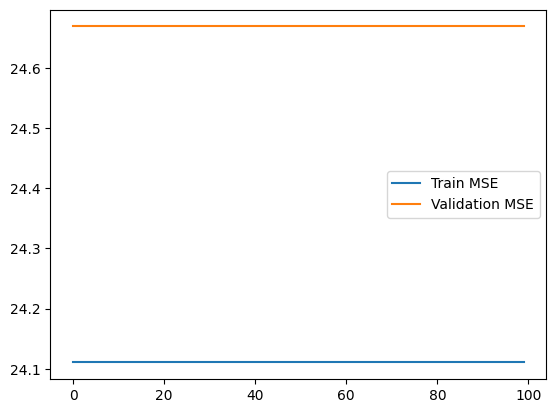


=== NN BP Train===
MAE Train: 1474.8877
MSE Train: 2894986.2639
MAPE Train: 0.7203
R² Train: -23.2223

---
MAE Test: 1493.2655
MSE Test: 3041363.3609
MAPE Test: 0.7371
R² Test: -24.3194


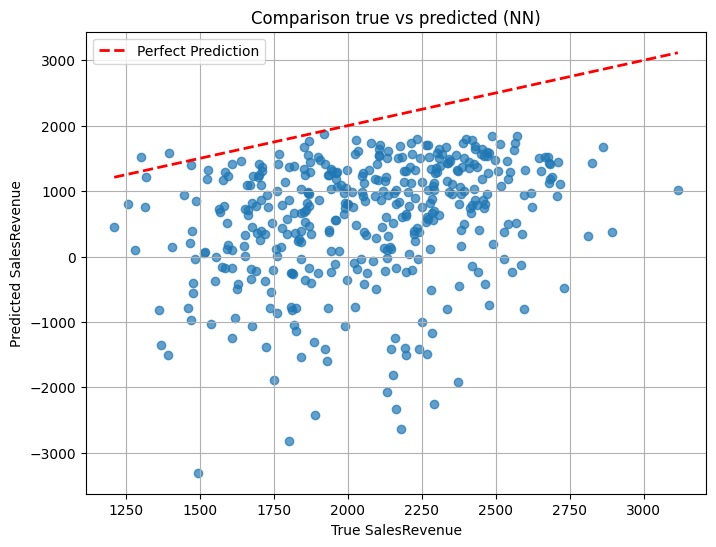


 Running 5/10
Hyperparameters: {'layers': [16, 128, 1], 'epochs': 100, 'lr': 0.001, 'momentum': 0.9, 'fact': 'tanh'}
[16, 128, 1]
Epoch 1/100, Train MSE: 31.174661, Validation MSE: 26.586431
Epoch 11/100, Train MSE: 2.524946, Validation MSE: 2.456719
Epoch 21/100, Train MSE: 0.286418, Validation MSE: 0.432829
Epoch 31/100, Train MSE: 0.121558, Validation MSE: 0.224269
Epoch 41/100, Train MSE: 0.114960, Validation MSE: 0.199383
Epoch 51/100, Train MSE: 0.104368, Validation MSE: 0.174820
Epoch 61/100, Train MSE: 0.090726, Validation MSE: 0.179329
Epoch 71/100, Train MSE: 0.107261, Validation MSE: 0.194007
Epoch 81/100, Train MSE: 0.074151, Validation MSE: 0.169551
Epoch 91/100, Train MSE: 0.072849, Validation MSE: 0.176713
Epoch 100/100, Train MSE: 0.070563, Validation MSE: 0.177616


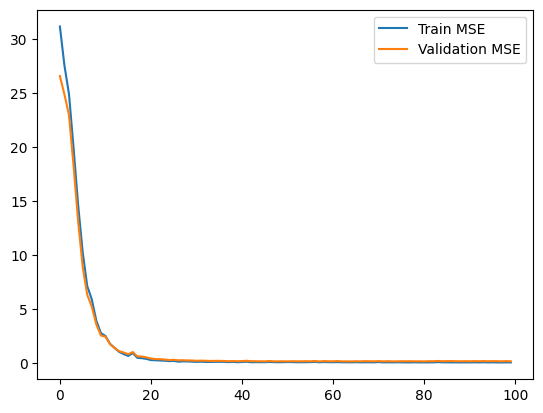


=== NN BP Train===
MAE Train: 78.6691
MSE Train: 10992.4786
MAPE Train: 0.0394
R² Train: 0.9080

---
MAE Test: 117.9509
MSE Test: 21675.3602
MAPE Test: 0.0590
R² Test: 0.8196


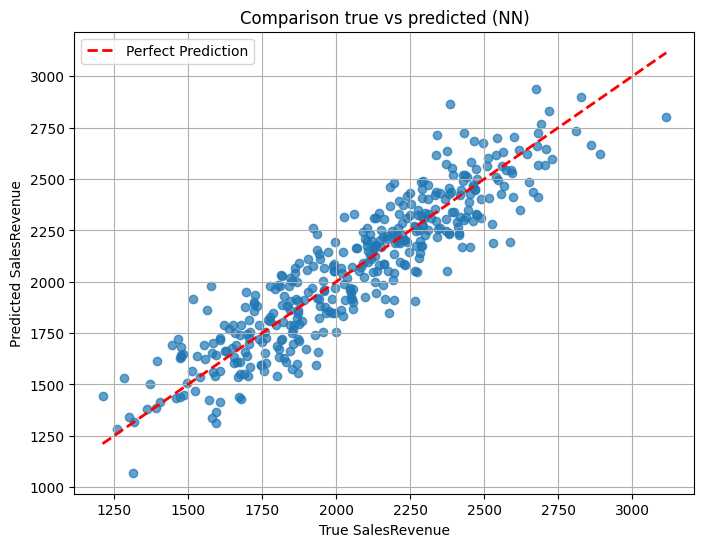


 Running 6/10
Hyperparameters: {'layers': [16, 64, 1], 'epochs': 100, 'lr': 0.1, 'momentum': 0.9, 'fact': 'relu'}
[16, 64, 1]
Epoch 1/100, Train MSE: 2577.374263, Validation MSE: 2682.254776
Epoch 11/100, Train MSE: 2577.374263, Validation MSE: 2682.254776
Epoch 21/100, Train MSE: 2577.374263, Validation MSE: 2682.254776
Epoch 31/100, Train MSE: 2577.374263, Validation MSE: 2682.254776
Epoch 41/100, Train MSE: 2577.374263, Validation MSE: 2682.254776
Epoch 51/100, Train MSE: 2577.374263, Validation MSE: 2682.254776
Epoch 61/100, Train MSE: 2577.374263, Validation MSE: 2682.254776
Epoch 71/100, Train MSE: 2577.374263, Validation MSE: 2682.254776
Epoch 81/100, Train MSE: 2577.374263, Validation MSE: 2682.254776
Epoch 91/100, Train MSE: 2577.374263, Validation MSE: 2682.254776
Epoch 100/100, Train MSE: 2577.374263, Validation MSE: 2682.254776


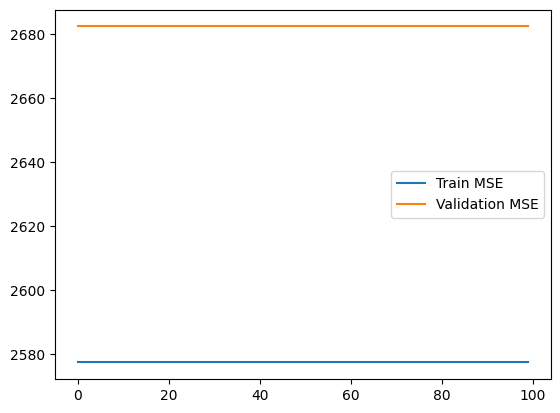


=== NN BP Train===
MAE Train: 16288.1612
MSE Train: 310548576.0592
MAPE Train: 8.1721
R² Train: -2597.3504

---
MAE Test: 16403.5965
MSE Test: 318475566.8755
MAPE Test: 8.2709
R² Test: -2650.3129


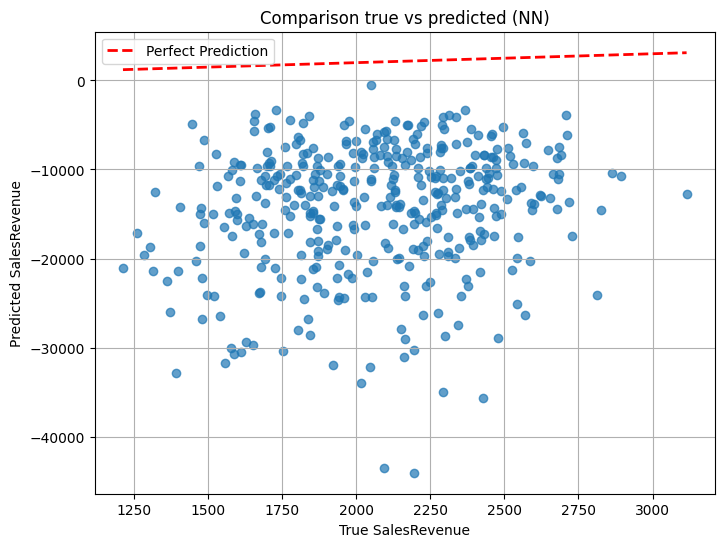


 Running 7/10
Hyperparameters: {'layers': [16, 64, 1], 'epochs': 100, 'lr': 0.01, 'momentum': 0.0, 'fact': 'sigmoid'}
[16, 64, 1]
Epoch 1/100, Train MSE: 0.257127, Validation MSE: 0.305243
Epoch 11/100, Train MSE: 0.149248, Validation MSE: 0.178983
Epoch 21/100, Train MSE: 0.126271, Validation MSE: 0.154866
Epoch 31/100, Train MSE: 0.113131, Validation MSE: 0.141185
Epoch 41/100, Train MSE: 0.108921, Validation MSE: 0.142727
Epoch 51/100, Train MSE: 0.098388, Validation MSE: 0.125956
Epoch 61/100, Train MSE: 0.096684, Validation MSE: 0.124571
Epoch 71/100, Train MSE: 0.099257, Validation MSE: 0.129805
Epoch 81/100, Train MSE: 0.088905, Validation MSE: 0.119264
Epoch 91/100, Train MSE: 0.088473, Validation MSE: 0.115596
Epoch 100/100, Train MSE: 0.085690, Validation MSE: 0.113510


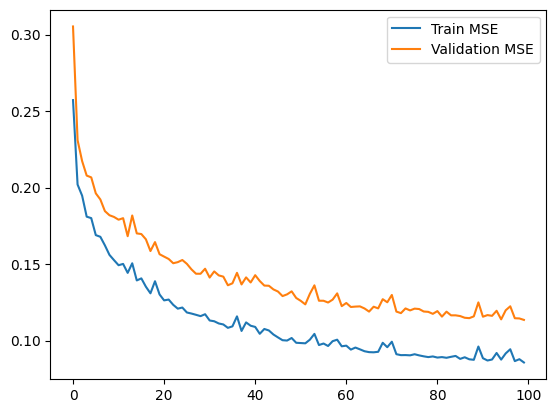


=== NN BP Train===
MAE Train: 82.5561
MSE Train: 10906.4788
MAPE Train: 0.0411
R² Train: 0.9087

---
MAE Test: 82.8916
MSE Test: 11349.9507
MAPE Test: 0.0411
R² Test: 0.9055


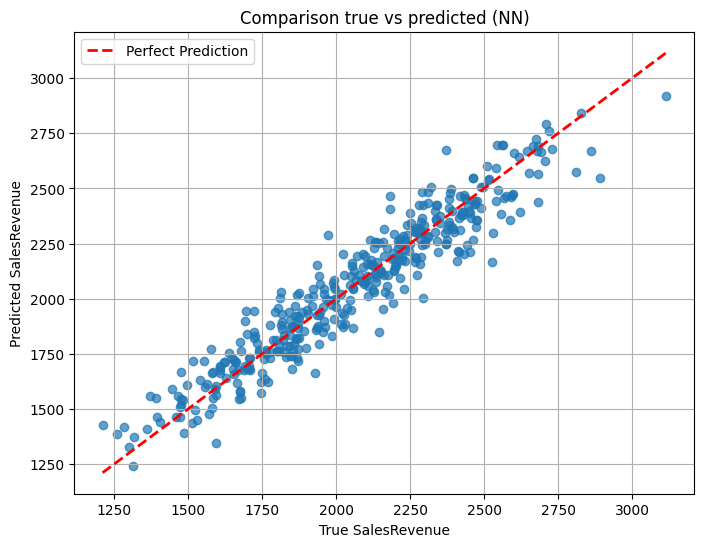


 Running 8/10
Hyperparameters: {'layers': [16, 64, 32, 1], 'epochs': 100, 'lr': 0.001, 'momentum': 0.5, 'fact': 'tanh'}
[16, 64, 32, 1]
Epoch 1/100, Train MSE: 3.427245, Validation MSE: 3.159142
Epoch 11/100, Train MSE: 0.473963, Validation MSE: 0.561366
Epoch 21/100, Train MSE: 0.169155, Validation MSE: 0.241552
Epoch 31/100, Train MSE: 0.139198, Validation MSE: 0.206720
Epoch 41/100, Train MSE: 0.128409, Validation MSE: 0.198353
Epoch 51/100, Train MSE: 0.118931, Validation MSE: 0.191023
Epoch 61/100, Train MSE: 0.114819, Validation MSE: 0.189178
Epoch 71/100, Train MSE: 0.109183, Validation MSE: 0.184475
Epoch 81/100, Train MSE: 0.102875, Validation MSE: 0.179685
Epoch 91/100, Train MSE: 0.100415, Validation MSE: 0.178599
Epoch 100/100, Train MSE: 0.096582, Validation MSE: 0.176734


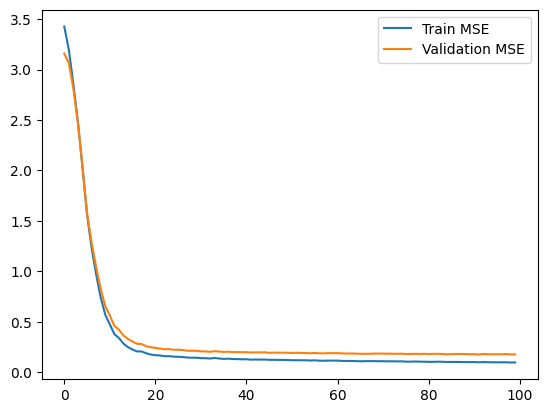


=== NN BP Train===
MAE Train: 89.7627
MSE Train: 13459.1108
MAPE Train: 0.0449
R² Train: 0.8874

---
MAE Test: 116.6942
MSE Test: 21589.8173
MAPE Test: 0.0582
R² Test: 0.8203


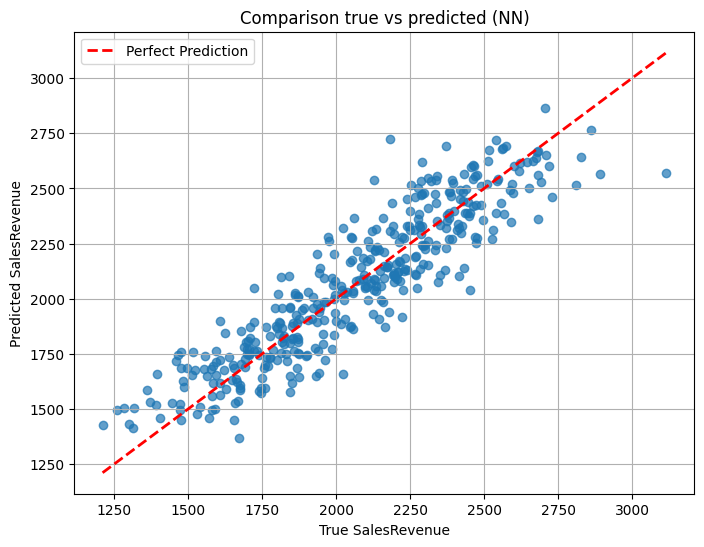


 Running 9/10
Hyperparameters: {'layers': [16, 8, 1], 'epochs': 100, 'lr': 0.0001, 'momentum': 0.9, 'fact': 'linear'}
[16, 8, 1]
Epoch 1/100, Train MSE: 0.315775, Validation MSE: 0.332007
Epoch 11/100, Train MSE: 0.079589, Validation MSE: 0.091319
Epoch 21/100, Train MSE: 0.078250, Validation MSE: 0.089284
Epoch 31/100, Train MSE: 0.079562, Validation MSE: 0.092263
Epoch 41/100, Train MSE: 0.079961, Validation MSE: 0.090678
Epoch 51/100, Train MSE: 0.079021, Validation MSE: 0.087644
Epoch 61/100, Train MSE: 0.078448, Validation MSE: 0.086244
Epoch 71/100, Train MSE: 0.079342, Validation MSE: 0.091536
Epoch 81/100, Train MSE: 0.077913, Validation MSE: 0.088491
Epoch 91/100, Train MSE: 0.079241, Validation MSE: 0.088777
Epoch 100/100, Train MSE: 0.078799, Validation MSE: 0.088108


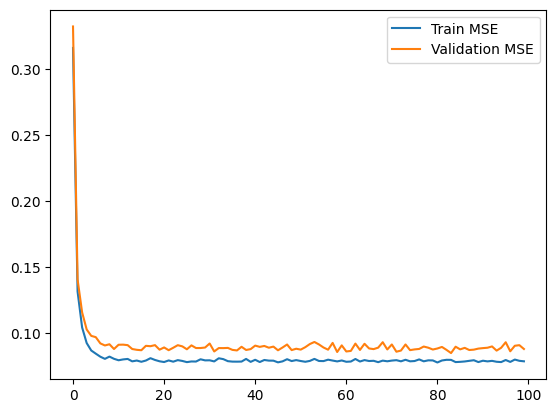


=== NN BP Train===
MAE Train: 78.2009
MSE Train: 9640.3628
MAPE Train: 0.0391
R² Train: 0.9193

---
MAE Test: 74.8934
MSE Test: 8851.8713
MAPE Test: 0.0375
R² Test: 0.9263


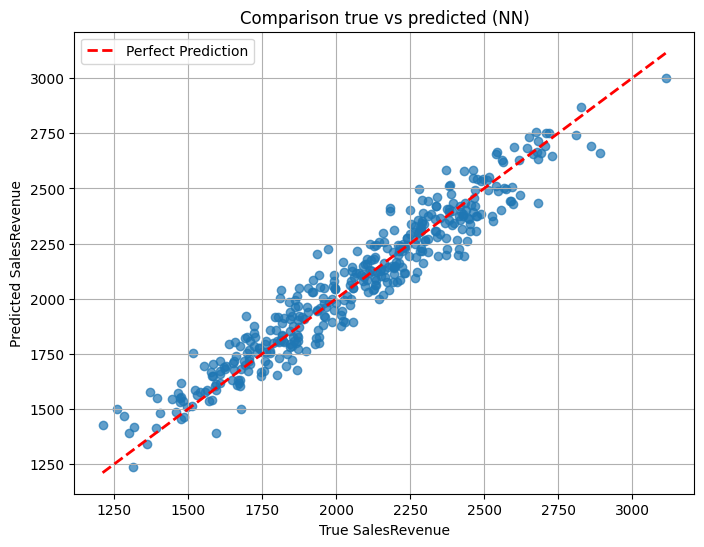


 Running 10/10
Hyperparameters: {'layers': [16, 32, 16, 1], 'epochs': 100, 'lr': 0.0001, 'momentum': 0.9, 'fact': 'relu'}
[16, 32, 16, 1]
Epoch 1/100, Train MSE: 3.662296, Validation MSE: 3.748388
Epoch 11/100, Train MSE: 4.031411, Validation MSE: 4.131950
Epoch 21/100, Train MSE: 4.031411, Validation MSE: 4.131950
Epoch 31/100, Train MSE: 4.031411, Validation MSE: 4.131950
Epoch 41/100, Train MSE: 4.031411, Validation MSE: 4.131950
Epoch 51/100, Train MSE: 4.031411, Validation MSE: 4.131950
Epoch 61/100, Train MSE: 4.031411, Validation MSE: 4.131950
Epoch 71/100, Train MSE: 4.031411, Validation MSE: 4.131950
Epoch 81/100, Train MSE: 4.031411, Validation MSE: 4.131950
Epoch 91/100, Train MSE: 4.031411, Validation MSE: 4.131950
Epoch 100/100, Train MSE: 4.031411, Validation MSE: 4.131950


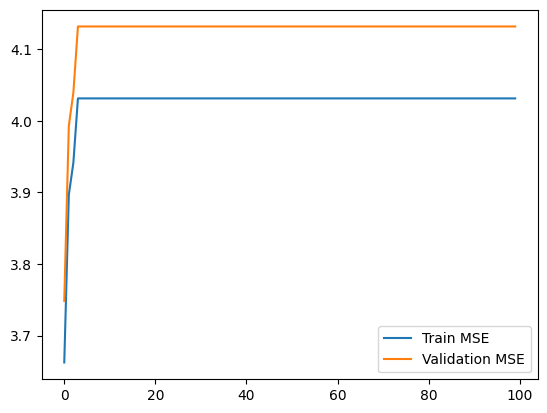


=== NN BP Train===
MAE Train: 593.7834
MSE Train: 484227.7397
MAPE Train: 0.2722
R² Train: -3.0515

---
MAE Test: 592.1368
MSE Test: 478481.9115
MAPE Test: 0.2739
R² Test: -2.9834


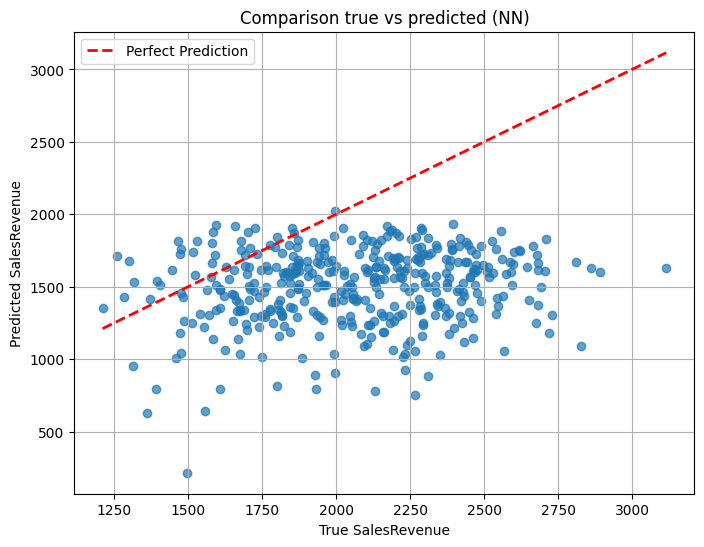

In [20]:
import sys
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error

# Añadir la carpeta src al path
sys.path.append(os.path.abspath("../../src"))

from NeuralNet import NeuralNet


hyperparameter_combinations = [
    {'layers': [16, 32, 1], 'epochs': 100, 'lr': 0.001, 'momentum': 0.9, 'fact': "relu"},
    {'layers': [16, 32, 1], 'epochs': 100, 'lr': 0.001, 'momentum': 0.0, 'fact': "relu"},
    {'layers': [16, 32, 1], 'epochs': 100, 'lr': 0.01, 'momentum': 0.5, 'fact': "sigmoid"},
    {'layers': [16, 64, 32, 1], 'epochs': 100, 'lr': 0.01,  'momentum': 0.9, 'fact': "relu"},
    {'layers': [16, 128, 1], 'epochs': 100, 'lr': 0.001, 'momentum': 0.9, 'fact': "tanh"},
    {'layers': [16, 64, 1], 'epochs': 100, 'lr': 0.1,'momentum': 0.9, 'fact': "relu"},
    {'layers': [16, 64, 1], 'epochs': 100, 'lr': 0.01, 'momentum': 0.0, 'fact': "sigmoid"},
    {'layers': [16, 64, 32, 1], 'epochs': 100, 'lr': 0.001, 'momentum': 0.5, 'fact': "tanh"},
    {'layers': [16, 8, 1], 'epochs': 100, 'lr': 0.0001, 'momentum': 0.9, 'fact': "linear"},
    {'layers': [16, 32, 16, 1], 'epochs': 100, 'lr': 0.0001,  'momentum': 0.9, 'fact': "relu"}
]

plot_data = {} 
best_mape = np.inf
best_params = None
best_index = -1
validation_split = 0.2

for i, params in enumerate(hyperparameter_combinations):
    print(f"\n Running {i+1}/{len(hyperparameter_combinations)}")
    print(f"Hyperparameters: {params}")

    nn = NeuralNet(params['layers'], params['epochs'], params['lr'], 
                   params['momentum'], params['fact'], validation_split)
    
    nn.fit(X_train, y_train_scaled)
    train_loss, val_loss = nn.loss_epochs()

    plt.plot(train_loss, label="Train MSE")
    plt.plot(val_loss, label="Validation MSE")
    plt.legend()
    plt.show()


    y_train_pred_scaled = nn.predict(X_train)
    y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1))
    y_train_true = scaler_y.inverse_transform(y_train_scaled.reshape(-1, 1))

    y_test_pred_scaled = nn.predict(X_test)
    y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1))
    y_test_true = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))

    mae_train_lr = mean_absolute_error(y_train_true, y_train_pred)
    mse_train_lr = mean_squared_error(y_train_true, y_train_pred)
    mape_train_lr = mean_absolute_percentage_error(y_train_true, y_train_pred)
    r2_train_lr = r2_score(y_train_true, y_train_pred)

    mae_test_lr = mean_absolute_error(y_test_true, y_test_pred)
    mse_test_lr = mean_squared_error(y_test_true, y_test_pred)
    mape_test_lr = mean_absolute_percentage_error(y_test_true, y_test_pred)
    r2_test_lr = r2_score(y_test_true, y_test_pred)

    print("\n=== NN BP Train===")
    print(f"MAE Train: {mae_train_lr:.4f}")
    print(f"MSE Train: {mse_train_lr:.4f}")
    print(f"MAPE Train: {mape_train_lr:.4f}")
    print(f"R² Train: {r2_train_lr:.4f}")
    print("\n---")
    print(f"MAE Test: {mae_test_lr:.4f}")
    print(f"MSE Test: {mse_test_lr:.4f}")
    print(f"MAPE Test: {mape_test_lr:.4f}")
    print(f"R² Test: {r2_test_lr:.4f}")

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_true, y_test_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
            'r--', lw=2, label='Perfect Prediction')
    plt.xlabel("True SalesRevenue")
    plt.ylabel("Predicted SalesRevenue")
    plt.title("Comparison true vs predicted (NN)")
    plt.legend()
    plt.grid(True)
    plt.show()
